In [18]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize as tk
import re             #regular Expression
from wordcloud import WordCloud ,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords as sp          #removal of stopwords #corpus is collection of text documents
import matplotlib.pyplot as plt
from textblob import TextBlob #tells sentiments whether negative positive or neutral or finegrained scoring
from nltk.stem import PorterStemmer, WordNetLemmatizer
ps=PorterStemmer()
wl=WordNetLemmatizer()
from PIL import Image


In [19]:
df=pd.read_csv("Axisbank_Tweets.csv")
print(df)

                                                  Tweet
0     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4     RT @prashant280294: #AxisBank \n\nSeems big mo...
...                                                 ...
1117  #BusinessNews: Equity benchmark #Sensex tumble...
1118  #BusinessNews: Equity benchmark #Sensex jumped...
1119  RT @Ashima_FnO: #AXISBANK \n trend breakout......
1120  #AXISBANK \n trend breakout.... https://t.co/W...
1121  RT @Ashima_FnO: #AXISBANK \n trend breakout......

[1122 rows x 1 columns]


In [20]:
print(df.values)


[['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?']
 ['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?']
 ['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?']
 ...
 ['RT @Ashima_FnO: #AXISBANK \n trend breakout.... https://t.co/WaOtmVE5f3']
 ['#AXISBANK \n trend breakout.... https://t.co/WaOtmVE5f3']
 ['RT @Ashima_FnO: #AXISBANK \n trend breakout.... https://t.co/WaOtmVE5f3']]


In [21]:
print(np.ndim(df.values))

2


In [22]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [23]:
list_data=df.values.tolist()#for converting data frame to list
print(list_data)

[['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?'], ['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?'], ['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?'], ['RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..\n#axisbank #?'], ['RT @prashant280294: #AxisBank \n\nSeems big move coming up ??\nLooks bullish here at 751\nCan do 785/795 in June series and 841 by July series?'], ['RT @CSCegov_: Launch of Axis Bank BCs through #CSC...\n\nTo hear more about the launch, watch it LIVE on the #CSC Facebook Page, on 17th June?'], ['RT @CSCegov_: Launch of Axis Bank BCs through #CSC...\n\nTo hear more about the launch, watch it LIVE on the #CS

In [24]:
filter=[]
for words in list_data:
    filter1=[]
    for i in words:
        filter1.append(str.lower(i)) #converting all texts into lowercase
        filter.append(filter1)      #and appending into new list

In [25]:
print(filter)

[['rt @garimas38018144: @kimansingh17 @hdfc_bank @icicibank please teach this bank @axisbanksupport how to solve customer issues..\n#axisbank #?'], ['rt @garimas38018144: @kimansingh17 @hdfc_bank @icicibank please teach this bank @axisbanksupport how to solve customer issues..\n#axisbank #?'], ['rt @garimas38018144: @kimansingh17 @hdfc_bank @icicibank please teach this bank @axisbanksupport how to solve customer issues..\n#axisbank #?'], ['rt @garimas38018144: @kimansingh17 @hdfc_bank @icicibank please teach this bank @axisbanksupport how to solve customer issues..\n#axisbank #?'], ['rt @prashant280294: #axisbank \n\nseems big move coming up ??\nlooks bullish here at 751\ncan do 785/795 in june series and 841 by july series?'], ['rt @cscegov_: launch of axis bank bcs through #csc...\n\nto hear more about the launch, watch it live on the #csc facebook page, on 17th june?'], ['rt @cscegov_: launch of axis bank bcs through #csc...\n\nto hear more about the launch, watch it live on the #cs

In [26]:
print(np.shape(filter))

(1122, 1)


In [27]:
filter_=[[re.sub(r'[^\w\s]',"",j)] for i in filter for j in i if re.sub(r'[^\w\s]',"",j)!=""]#removes special symbols
print(filter_)

[['rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach this bank axisbanksupport how to solve customer issues\naxisbank '], ['rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach this bank axisbanksupport how to solve customer issues\naxisbank '], ['rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach this bank axisbanksupport how to solve customer issues\naxisbank '], ['rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach this bank axisbanksupport how to solve customer issues\naxisbank '], ['rt prashant280294 axisbank \n\nseems big move coming up \nlooks bullish here at 751\ncan do 785795 in june series and 841 by july series'], ['rt cscegov_ launch of axis bank bcs through csc\n\nto hear more about the launch watch it live on the csc facebook page on 17th june'], ['rt cscegov_ launch of axis bank bcs through csc\n\nto hear more about the launch watch it live on the csc facebook page on 17th june'], ['rt cscegov_ launch of axis bank bcs

In [28]:
filter_text=[tk(sublist) for i in filter_ for sublist in i ]
print(filter_text)

[['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'this', 'bank', 'axisbanksupport', 'how', 'to', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'this', 'bank', 'axisbanksupport', 'how', 'to', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'this', 'bank', 'axisbanksupport', 'how', 'to', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'this', 'bank', 'axisbanksupport', 'how', 'to', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'prashant280294', 'axisbank', 'seems', 'big', 'move', 'coming', 'up', 'looks', 'bullish', 'here', 'at', '751', 'can', 'do', '785795', 'in', 'june', 'series', 'and', '841', 'by', 'july', 'series'], ['rt', 'cscegov_', 'launch', 'of', 'axis', 'bank', 'bcs', 'through', 'csc', 'to

In [29]:
compare=set(sp.words('English'))#stopwords
print(compare)

{'didn', 'what', 'ours', 'about', 'those', "weren't", 'or', 'he', 'be', 've', 'wouldn', 'had', 'each', 'just', 'ain', "it's", 'through', 'yourself', 'off', 'nor', 'have', 'before', 'under', "aren't", 'both', 'himself', 'were', 'this', 'am', "she's", 'them', 'because', "you'll", "mustn't", 'don', 'herself', "hasn't", 'but', "needn't", 'having', 'are', 'to', 'above', "mightn't", 'a', "wouldn't", 'at', 'myself', 'for', 'hasn', "shouldn't", 'which', 'isn', 'in', 'after', 'needn', 'where', 'most', 'theirs', 'his', 'did', 't', 'does', 'further', 'doing', 'haven', "isn't", 'can', 'very', 'doesn', 'll', 'weren', 'themselves', 'will', 'not', 'during', 'was', 'it', 'until', 'with', 'some', 'ourselves', 'their', "you've", 'couldn', 'against', "haven't", 'over', 'own', "didn't", 'why', 's', 'on', 'being', 'd', 'her', "hadn't", 'won', 'same', 'from', 'm', 'few', 'so', 'no', 'has', 'how', 'here', 'is', 'any', 'when', 'that', 'whom', 'mustn', 'yourselves', 'do', 'should', 'hers', 'an', 'down', "shoul

In [30]:
stopwords_=[
        [word for word in sentence if word not in compare]  
        for sentence in filter_text
    ]


print(stopwords_)

[['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'bank', 'axisbanksupport', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'bank', 'axisbanksupport', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'bank', 'axisbanksupport', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'garimas38018144', 'kimansingh17', 'hdfc_bank', 'icicibank', 'please', 'teach', 'bank', 'axisbanksupport', 'solve', 'customer', 'issues', 'axisbank'], ['rt', 'prashant280294', 'axisbank', 'seems', 'big', 'move', 'coming', 'looks', 'bullish', '751', '785795', 'june', 'series', '841', 'july', 'series'], ['rt', 'cscegov_', 'launch', 'axis', 'bank', 'bcs', 'csc', 'hear', 'launch', 'watch', 'live', 'csc', 'facebook', 'page', '17th', 'june'], ['rt', 'cscegov_', 'launch', 'axis', 'bank', 'bcs', 'csc', 'hear', 'launch', 

In [31]:
stopwords_

[['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'prashant280294',
  'axisbank',
  'seems',
  'big',
  'move',
  'coming',
  'looks',
  'bullish',
  '751',
  '785795',
  'june',
  'series',
  '841',
  'july',
  'series'],
 ['rt',
  'cscegov_',
  'launch',
  'axis',
  'bank',
  'bcs',
  'csc',
  'hear',
  '

In [32]:
aft_stem= [                                               #ps is porterstemmer,wl is wordnetlemmatizer
             [ps.stem(word) for word in sentence]
             for sentence in stopwords_
           ]

In [33]:
stopwords_


[['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'garimas38018144',
  'kimansingh17',
  'hdfc_bank',
  'icicibank',
  'please',
  'teach',
  'bank',
  'axisbanksupport',
  'solve',
  'customer',
  'issues',
  'axisbank'],
 ['rt',
  'prashant280294',
  'axisbank',
  'seems',
  'big',
  'move',
  'coming',
  'looks',
  'bullish',
  '751',
  '785795',
  'june',
  'series',
  '841',
  'july',
  'series'],
 ['rt',
  'cscegov_',
  'launch',
  'axis',
  'bank',
  'bcs',
  'csc',
  'hear',
  '

In [34]:
lem= [
    [wl.lemmatize(i)  for i in after]
    for after in stopwords_
  ]

In [35]:
dataf=pd.DataFrame(lem)

In [36]:
sentences = [" ".join(inner_list) for inner_list in lem]

In [37]:
print(sentences)

['rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank', 'rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank', 'rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank', 'rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank', 'rt prashant280294 axisbank seems big move coming look bullish 751 785795 june series 841 july series', 'rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june', 'rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june', 'rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june', 'rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june', 'axis bank revise sm alert charge saving account detail

In [38]:
print(np.shape(sentences))

(1122,)


In [39]:
dataf2=pd.DataFrame(sentences,columns=['Tweets'])
dataf2.to_csv('Preprocess.csv')

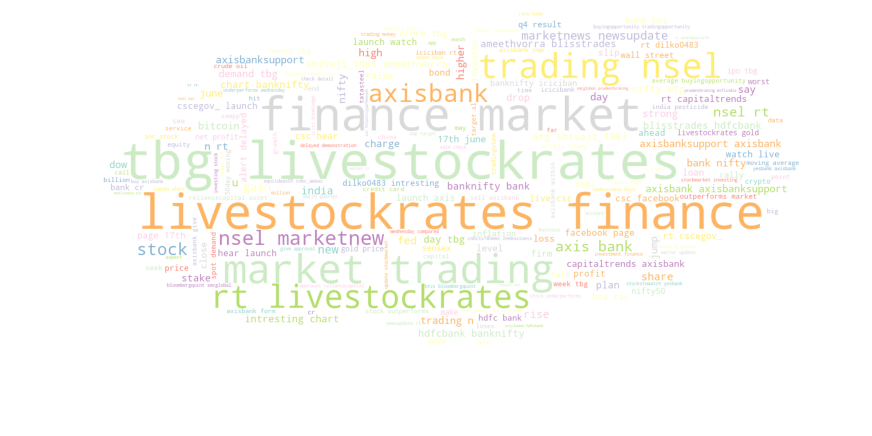

In [40]:
mask = np.array(Image.open('cloud.jpeg'))
wordcloud = WordCloud(width=800, height=400,mask=mask,background_color='white',contour_color="black",colormap="Set3").generate( ' '.join(sentences))

plt.figure(figsize=(11, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
print(dataf2)

                                                 Tweets
0     rt garimas38018144 kimansingh17 hdfc_bank icic...
1     rt garimas38018144 kimansingh17 hdfc_bank icic...
2     rt garimas38018144 kimansingh17 hdfc_bank icic...
3     rt garimas38018144 kimansingh17 hdfc_bank icic...
4     rt prashant280294 axisbank seems big move comi...
...                                                 ...
1117  businessnews equity benchmark sensex tumbled 1...
1118  businessnews equity benchmark sensex jumped 22...
1119  rt ashima_fno axisbank trend breakout httpstco...
1120         axisbank trend breakout httpstcowaotmve5f3
1121  rt ashima_fno axisbank trend breakout httpstco...

[1122 rows x 1 columns]


In [42]:
for index, row in dataf2.iterrows():  
    tweet_text = row['Tweets'] 
    analysis = TextBlob(tweet_text)
    
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    # Assign sentiment to a new column or print it
    dataf2.at[index, 'Sentiment'] = sentiment
    print(f"Tweet {index + 1} is {sentiment}: {tweet_text}")

dataf2.to_csv('completed.csv')  

Tweet 1 is Neutral: rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank
Tweet 2 is Neutral: rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank
Tweet 3 is Neutral: rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank
Tweet 4 is Neutral: rt garimas38018144 kimansingh17 hdfc_bank icicibank please teach bank axisbanksupport solve customer issue axisbank
Tweet 5 is Neutral: rt prashant280294 axisbank seems big move coming look bullish 751 785795 june series 841 july series
Tweet 6 is Positive: rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june
Tweet 7 is Positive: rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june
Tweet 8 is Positive: rt cscegov_ launch axis bank bcs csc hear launch watch live csc facebook page 17th june
Tweet 9 

In [43]:
#saving the image of wordcloud
wordcloud.to_file ('wordcloud.png')
plt.show()

In [44]:
import pandas as pd
from textblob import TextBlob

# Load your CSV file into a DataFrame
df = pd.read_csv('completed.csv')

# Assuming your CSV has a column named 'comments' containing the comments
comments = df['Tweets']

# Function to get sentiment category using TextBlob
def get_sentiment(comment):
    analysis = TextBlob(comment)
    # Classify as positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each comment and create a new column 'sentiment'
df['sentiment'] = comments.apply(get_sentiment)

# Get counts of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print the counts
print("Positive Comments:", sentiment_counts['positive'])
print("Negative Comments:", sentiment_counts['negative'])
print("Neutral Comments:", sentiment_counts['neutral'])


Positive Comments: 284
Negative Comments: 172
Neutral Comments: 666


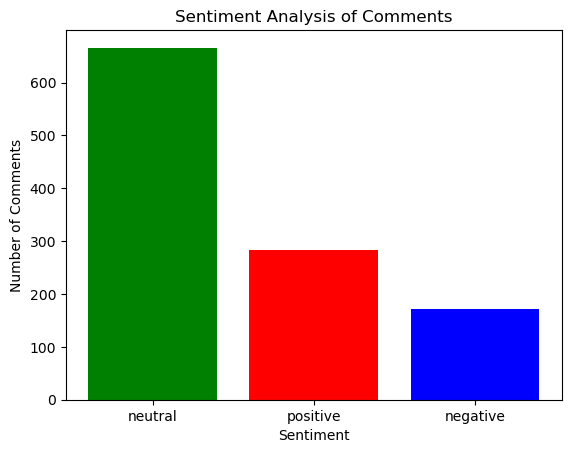

In [45]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
df = pd.read_csv('completed.csv')

# Assuming your CSV has a column named 'comments' containing the comments
comments = df['Tweets']

# Function to get sentiment category using TextBlob
def get_sentiment(comment):
    analysis = TextBlob(comment)
    # Classify as positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each comment and create a new column 'sentiment'
df['sentiment'] = comments.apply(get_sentiment)

# Get counts of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()
